# Predicting H1N1 and FLU Vaccines

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE 
from xgboost import XGBClassifier
import pickle

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_features = pd.read_csv('data/training_set_features.csv')
df_labels = pd.read_csv('data/training_set_labels.csv')

In [3]:
df_features

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [4]:
df_features.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [5]:
df_features.shape

(26707, 36)

In [6]:
df_labels

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [7]:
df_labels.columns

Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], dtype='object')

In [8]:
df_labels.shape

(26707, 3)

In [9]:
df = df_features.set_index('respondent_id').join(df_labels.set_index('respondent_id'))
print(df.shape)
df.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


### Deal with missing values

In [10]:
df.isnull().sum() 

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

### For numerical columns (features), we will fill the NaN with the median.

In [11]:
df.fillna(df.median(),inplace=True)

In [12]:
df.isnull().sum()

h1n1_concern                       0
h1n1_knowledge                     0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                   0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance                   0
opinion_h1n1_vacc_effective        0
opinion_h1n1_risk                  0
opinion_h1n1_sick_from_vacc        0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

### For categorical variables, we replace the missing values with the word 'unknown'.


In [13]:
df.replace(np.nan,'unknown',inplace=True)

In [14]:
df.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [15]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

In [16]:
'''
'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'education', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'
    
'''

"\n'behavioral_antiviral_meds', 'behavioral_avoidance',\n       'behavioral_face_mask', 'behavioral_wash_hands',\n       'behavioral_large_gatherings', 'behavioral_outside_home',\n       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',\n       'chronic_med_condition', 'child_under_6_months', 'health_worker',\n       'health_insurance', 'education', 'income_poverty', 'marital_status',\n       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',\n       'household_adults', 'household_children', 'employment_industry',\n       'employment_occupation'\n    \n"

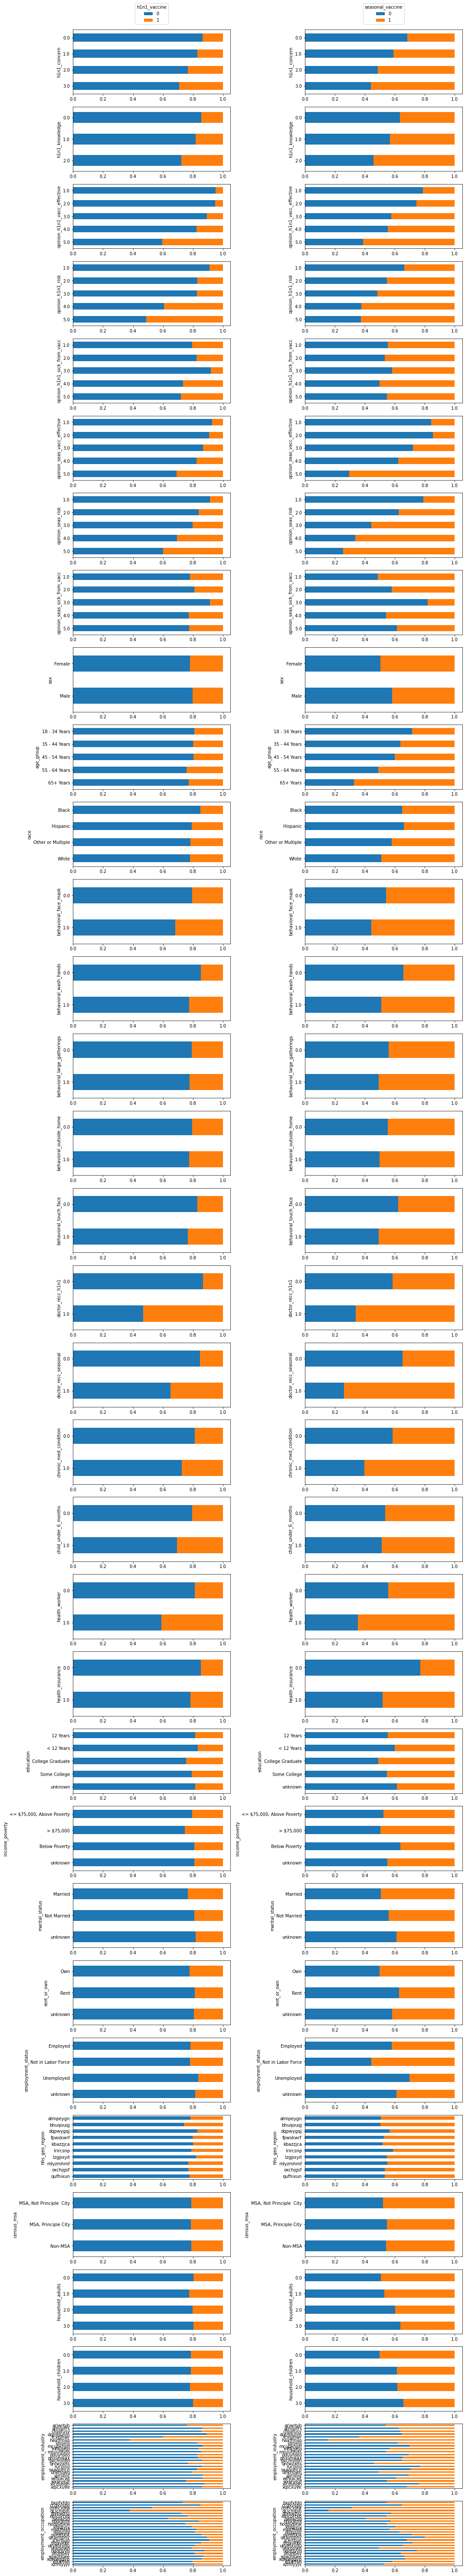

In [17]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
    'behavioral_face_mask', 
    'behavioral_wash_hands',
    'behavioral_large_gatherings', 
    'behavioral_outside_home',
    'behavioral_touch_face', 
    'doctor_recc_h1n1', 
    'doctor_recc_seasonal',
    'chronic_med_condition', 
    'child_under_6_months', 
    'health_worker',
    'health_insurance', 
    'education', 
    'income_poverty', 
    'marital_status',
    'rent_or_own', 
    'employment_status', 
    'hhs_geo_region', 
    'census_msa',
    'household_adults', 
    'household_children', 
    'employment_industry',
    'employment_occupation'
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(15,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', df, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

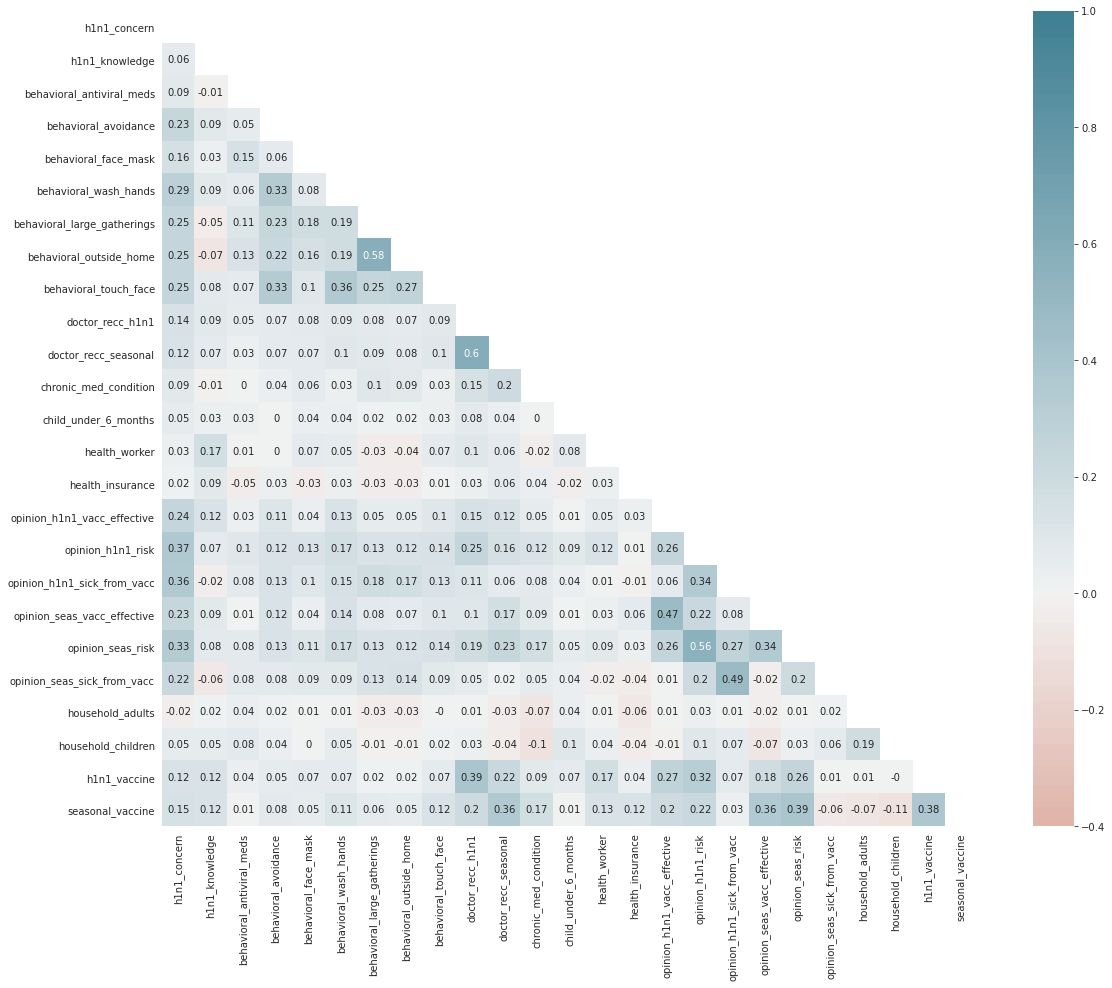

In [18]:
# import seaborn as sns
# plt.figure(figsize=(30,20))
# sns.heatmap(df.corr().round(2),annot=True,vmin=-1,vmax=1)

corr = df.corr().round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 15))
    ax = sns.heatmap(corr, cmap = sns.diverging_palette(20, 220, n = 200),annot= True, 
                     xticklabels = corr.columns.values,
                     yticklabels = corr.columns.values,
                     vmin = -.4,
                     vmax = 1,
                     center = 0,
                     mask=mask, square=True)

In [19]:
(df=='unknown').sum()

h1n1_concern                       0
h1n1_knowledge                     0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                   0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance                   0
opinion_h1n1_vacc_effective        0
opinion_h1n1_risk                  0
opinion_h1n1_sick_from_vacc        0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [20]:
df_2 = df.drop(columns =['hhs_geo_region', 
                   'employment_industry', 
                   'employment_occupation', 
                   'household_adults',
                   'household_children',
                   'employment_status', 
                   'income_poverty',
                   'race', 
                   'behavioral_large_gatherings',
                    'census_msa',
                    'seasonal_vaccine'               
                    ])
                               

In [21]:
df_2

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,...,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,sex,marital_status,rent_or_own,h1n1_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,Female,Not Married,Own,0
1,3.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,Male,Not Married,Rent,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,Male,Not Married,Own,0
3,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,5.0,5.0,4.0,1.0,65+ Years,12 Years,Female,Not Married,Rent,0
4,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,Female,Married,Own,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,5.0,2.0,2.0,65+ Years,Some College,Female,Not Married,Own,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,Male,Not Married,Rent,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,Female,Not Married,Own,0


In [22]:
df_2.dtypes


h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
sex                             object
marital_status                  object
rent_or_own                     object
h1n1_vaccine             

In [23]:
(df_2=='unknown').sum()

h1n1_concern                      0
h1n1_knowledge                    0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_h1n1                  0
doctor_recc_seasonal              0
chronic_med_condition             0
child_under_6_months              0
health_worker                     0
health_insurance                  0
opinion_h1n1_vacc_effective       0
opinion_h1n1_risk                 0
opinion_h1n1_sick_from_vacc       0
opinion_seas_vacc_effective       0
opinion_seas_risk                 0
opinion_seas_sick_from_vacc       0
age_group                         0
education                      1407
sex                               0
marital_status                 1408
rent_or_own                    2042
h1n1_vaccine                      0
dtype: int64

### Other option for categorical to numerical transformation: One hot encoding:


In [24]:
df_3=pd.get_dummies(df_2,drop_first=True)
df_3

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,...,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,education_unknown,sex_Male,marital_status_Not Married,marital_status_unknown,rent_or_own_Rent,rent_or_own_unknown
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,1,1,0,1,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,1,0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,1,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,0,1,0,0,1,0,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,1,1,0,1,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,0


In [25]:
df_2['rent_or_own'] = df_2['rent_or_own'].replace(to_replace = "Own", value = 0)
df_2['rent_or_own'] = df_2['rent_or_own'].replace(to_replace = "Rent", value = 1)
df_2['rent_or_own'] = df_2['rent_or_own'].replace(to_replace = "unknown", value = 2)

# encoder=LabelEncoder()
# df_2['rent_or_own']=encoder.fit_transform(df_2['rent_or_own'])

In [26]:
df_2['marital_status'] = df_2['marital_status'].replace(to_replace = "Not Married", value = 0)
df_2['marital_status'] = df_2['marital_status'].replace(to_replace = "Married", value = 1)
df_2['marital_status'] = df_2['marital_status'].replace(to_replace = "unknown", value = 2)



# encoder=LabelEncoder()
# df_2['marital_status']=encoder.fit_transform(df_2['marital_status'])

In [27]:
df_2['sex'] = df_2['sex'].replace(to_replace = "Female", value = 0)
df_2['sex'] = df_2['sex'].replace(to_replace = "Male", value = 1)

# encoder=LabelEncoder()
# df_2['sex']=encoder.fit_transform(df_2['sex'])

In [28]:
df_2['education'] = df_2['education'].replace(to_replace = "< 12 Years", value = 0)
df_2['education'] = df_2['education'].replace(to_replace = "12 Years", value = 1)
df_2['education'] = df_2['education'].replace(to_replace = "Some College", value = 2)
df_2['education'] = df_2['education'].replace(to_replace = "College Graduate", value = 3)
df_2['education'] = df_2['education'].replace(to_replace = "unknown", value = 4)

# encoder=LabelEncoder()
# df_2['education']=encoder.fit_transform(df_2['education'])

In [29]:
df_2['age_group'] = df_2['age_group'].replace(to_replace = "18 - 34 Years", value = 0)
df_2['age_group'] = df_2['age_group'].replace(to_replace = "35 - 44 Years", value = 1)
df_2['age_group'] = df_2['age_group'].replace(to_replace = "45 - 54 Years", value = 2)
df_2['age_group'] = df_2['age_group'].replace(to_replace = "55 - 64 Years", value = 3)
df_2['age_group'] = df_2['age_group'].replace(to_replace = "65+ Years", value = 4)

# encoder=LabelEncoder()
# df_2['age_group']=encoder.fit_transform(df_2['age_group'])

In [30]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26707 non-null  float64
 1   h1n1_knowledge               26707 non-null  float64
 2   behavioral_antiviral_meds    26707 non-null  float64
 3   behavioral_avoidance         26707 non-null  float64
 4   behavioral_face_mask         26707 non-null  float64
 5   behavioral_wash_hands        26707 non-null  float64
 6   behavioral_outside_home      26707 non-null  float64
 7   behavioral_touch_face        26707 non-null  float64
 8   doctor_recc_h1n1             26707 non-null  float64
 9   doctor_recc_seasonal         26707 non-null  float64
 10  chronic_med_condition        26707 non-null  float64
 11  child_under_6_months         26707 non-null  float64
 12  health_worker                26707 non-null  float64
 13  health_insurance

## Train Model - H1N1 

In [31]:
df_2.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1',
       'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months',
       'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'sex',
       'marital_status', 'rent_or_own', 'h1n1_vaccine'],
      dtype='object')

In [32]:
## Train model
X = df_2.drop("h1n1_vaccine", axis=1)
y = df_2["h1n1_vaccine"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

### Smote

In [33]:
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

## Decision Tree - H1N1

In [34]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train,y_train) 

DecisionTreeClassifier(random_state=42)

In [35]:
y_test_pred=tree_model.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.7503369776845888


In [36]:
y_score=tree_model.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.643006421839562


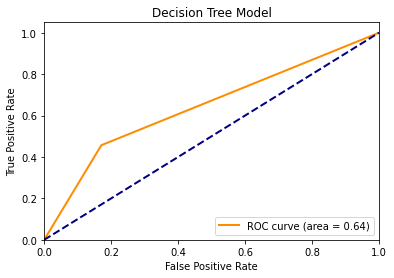

In [37]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree Model")
plt.legend(loc="lower right")
plt.show()

In [38]:
## Cross validation on the whole dataset, take advantage of the whole dataset
tree_model = DecisionTreeClassifier(random_state=42)
tree_log_loss = cross_val_score(tree_model, X, y, scoring="accuracy",cv=5)
tree_log_loss

array([0.74372894, 0.75308873, 0.7560382 , 0.74517881, 0.75248081])

In [39]:
print('Cross Validation accuracy',tree_log_loss.mean())

Cross Validation accuracy 0.7501030961366305


## Random Forest - H1N1

### RF Model 1

In [40]:
## Train model
rf_model = RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=500, random_state=42)

In [41]:
y_test_pred=rf_model.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8252209075932305


In [42]:
y_score=rf_model.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8264964746494553


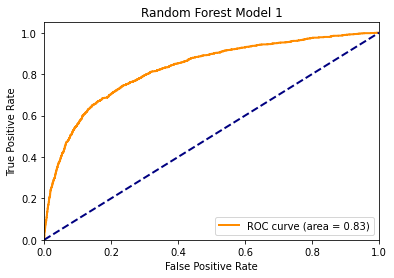

In [43]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Model 1")
plt.legend(loc="lower right")
plt.show()

### RF Model 2

In [46]:
## Train model
rf_model_2 = RandomForestClassifier(n_estimators=500,min_samples_leaf=4, max_depth=15,max_features=.2, random_state=42)
rf_model_2.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, max_features=0.2, min_samples_leaf=4,
                       n_estimators=500, random_state=42)

In [47]:
filepath = 'models/Random_Forest/H1N1/model_3.pickl'
pickle.dump(rf_model_2.fit, open(filepath, 'wb'))

In [48]:
y_test_pred=rf_model_2.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8312116219859218


In [49]:
y_score=rf_model_2.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.828121703737598


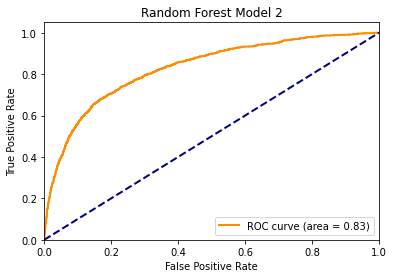

In [50]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Model 2")
plt.legend(loc="lower right")
plt.show()

### RF Model 3

In [51]:
## Train model
rf_model_3 = RandomForestClassifier(n_estimators=500, min_samples_leaf=5, max_depth=5,max_features=.5)
rf_model_3.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_features=0.5, min_samples_leaf=5,
                       n_estimators=500)

In [52]:
y_test_pred=rf_model_3.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8063501572562528


In [53]:
y_score=rf_model_3.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8217765954680689


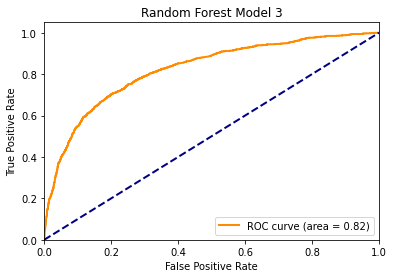

In [54]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Model 3")
plt.legend(loc="lower right")
plt.show()

### Hyper parameter Tuning on Random Forest

In [55]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [56]:
# params={'criterion':['gini', 'entropy'],
#           'max_depth':[None, 6, 8],
#           'class_weight':[None, 'balanced'],
#           'min_samples_split':[50, 100],
#           'max_features':['sqrt','log2', 50]}
# model = RandomForestClassifier()


# grid_search=GridSearchCV(model,params,cv=5,scoring='accuracy')
# grid_search.fit(X_train,y_train)

In [57]:
# grid_search.best_params_

In [58]:
# best_model=grid_search.best_estimator_

In [59]:
# best_model=grid_search.best_estimator_
# y_test_pred=best_model.predict(X_test)
# test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
# print('Test Set accuracy: ',test_accuracy)

In [60]:
# y_score=best_model.predict_proba(X_test)[:,1]
# fpr, tpr,_ = roc_curve(y_test, y_score)
# roc_auc = auc(fpr, tpr)
# print('ROC AUC',roc_auc)

In [61]:
# plt.figure()
# lw = 2
# plt.plot(
#     fpr,
#     tpr,
#     color="darkorange",
#     lw=lw,
#     label="ROC curve (area = %0.2f)" % roc_auc,
# )
# plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Receiver operating characteristic example")
# plt.legend(loc="lower right")
# plt.show()

### Sorting the features based on their importance from most to least 

In [62]:
features=X_train.columns
index_importances=rf_model.feature_importances_.argsort()[::-1]
sorted_features=features[index_importances]
sorted_features

Index(['doctor_recc_h1n1', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'doctor_recc_seasonal', 'opinion_seas_risk',
       'opinion_seas_vacc_effective', 'health_worker', 'h1n1_knowledge',
       'h1n1_concern', 'behavioral_touch_face', 'chronic_med_condition',
       'behavioral_wash_hands', 'behavioral_outside_home',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_sick_from_vacc',
       'behavioral_avoidance', 'age_group', 'rent_or_own',
       'behavioral_face_mask', 'education', 'health_insurance',
       'child_under_6_months', 'sex', 'marital_status',
       'behavioral_antiviral_meds'],
      dtype='object')

In [63]:
## feature importances
for ii,feature in enumerate(features):
    print(feature,rf_model.feature_importances_[ii])

h1n1_concern 0.02377273629426479
h1n1_knowledge 0.04692357902076747
behavioral_antiviral_meds 0.002778980589606965
behavioral_avoidance 0.012610707875573373
behavioral_face_mask 0.005961253194145372
behavioral_wash_hands 0.014758339268197904
behavioral_outside_home 0.014743875166102323
behavioral_touch_face 0.01682951152305928
doctor_recc_h1n1 0.24305215820094875
doctor_recc_seasonal 0.07818908526654272
chronic_med_condition 0.015156250700370653
child_under_6_months 0.003501603662642011
health_worker 0.052799783316026014
health_insurance 0.005688724037804209
opinion_h1n1_vacc_effective 0.16696412002699879
opinion_h1n1_risk 0.1280860590838542
opinion_h1n1_sick_from_vacc 0.013990013944277561
opinion_seas_vacc_effective 0.053237985173492396
opinion_seas_risk 0.05952387027728035
opinion_seas_sick_from_vacc 0.013960405225120914
age_group 0.007790602041426494
education 0.005732188159944013
sex 0.0033924855760041226
marital_status 0.0030443599538336114
rent_or_own 0.007511322421715744


## ADA Boost  - H1N1

In [64]:
## Train model
ab_model = AdaBoostClassifier()
ab_model.fit(X_train,y_train)

AdaBoostClassifier()

In [65]:
y_test_pred=ab_model.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8166841395836454


In [66]:
y_score=ab_model.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8147732064244665


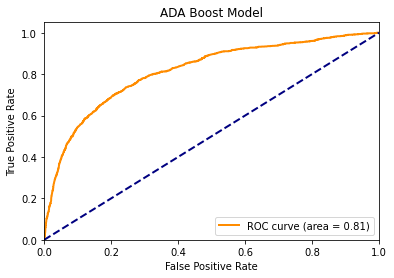

In [67]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ADA Boost Model")
plt.legend(loc="lower right")
plt.show()

## Gradient Boost  - H1N1

### GB Model 1 - H1N1

In [68]:
## Train model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [69]:
y_test_pred=gb_model.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.83076231840647


In [70]:
y_score=gb_model.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8248530176909522


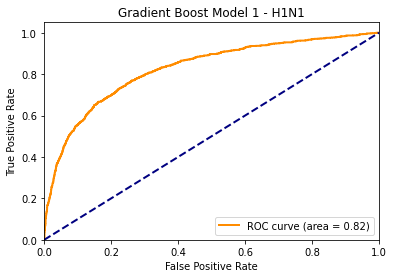

In [71]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boost Model 1 - H1N1")
plt.legend(loc="lower right")
plt.show()

### GB Model 2  - H1N1

In [72]:
gb_2_model = GradientBoostingClassifier(n_estimators=50, max_depth = 5)
gb_2_model.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=50)

In [73]:
y_test_pred=gb_2_model.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8285158005092107


In [74]:
y_score=gb_2_model.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)


ROC AUC 0.825897032368677


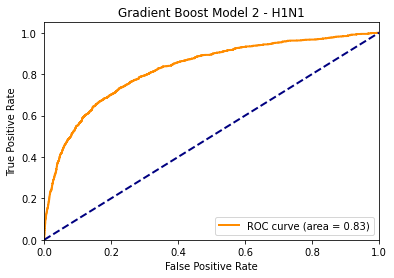

In [75]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boost Model 2 - H1N1")
plt.legend(loc="lower right")
plt.show()

### GB Model 3 - H1N1

In [76]:
gb_3_model = GradientBoostingClassifier(n_estimators=75, max_depth = 5, random_state = 42)
gb_3_model.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=75, random_state=42)

In [77]:
y_test_pred=gb_3_model.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8327093005840946


In [78]:
y_score=gb_3_model.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)


ROC AUC 0.8274275033366385


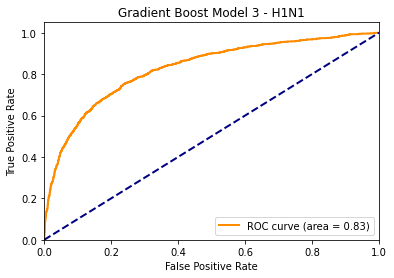

In [79]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boost Model 3 - H1N1")
plt.legend(loc="lower right")
plt.show()

In [80]:
## Sort the features based on their importance from most important to least important
features=X_train.columns
index_importances=gb_3_model.feature_importances_.argsort()[::-1]
sorted_features=features[index_importances]
sorted_features

Index(['doctor_recc_h1n1', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'health_worker', 'h1n1_knowledge', 'opinion_seas_risk',
       'opinion_seas_vacc_effective', 'h1n1_concern', 'chronic_med_condition',
       'doctor_recc_seasonal', 'opinion_seas_sick_from_vacc',
       'opinion_h1n1_sick_from_vacc', 'behavioral_outside_home',
       'behavioral_touch_face', 'behavioral_avoidance',
       'behavioral_wash_hands', 'behavioral_face_mask', 'rent_or_own',
       'health_insurance', 'age_group', 'child_under_6_months',
       'behavioral_antiviral_meds', 'education', 'marital_status', 'sex'],
      dtype='object')

In [81]:
## feature importances
for ii,feature in enumerate(features):
    print(feature,gb_3_model.feature_importances_[ii])

h1n1_concern 0.018112232580629665
h1n1_knowledge 0.04288817264450733
behavioral_antiviral_meds 0.0014886890664081783
behavioral_avoidance 0.00951052586949429
behavioral_face_mask 0.006407577967694676
behavioral_wash_hands 0.009138672712996732
behavioral_outside_home 0.01366819053514239
behavioral_touch_face 0.009826766168473567
doctor_recc_h1n1 0.3607126958609402
doctor_recc_seasonal 0.017021301950241288
chronic_med_condition 0.017931022263618902
child_under_6_months 0.0030950010064974974
health_worker 0.04924389202354243
health_insurance 0.005079415979979782
opinion_h1n1_vacc_effective 0.20826557918303137
opinion_h1n1_risk 0.12776074466803639
opinion_h1n1_sick_from_vacc 0.014541137706511092
opinion_seas_vacc_effective 0.02677473331315288
opinion_seas_risk 0.029880580391460968
opinion_seas_sick_from_vacc 0.01597564994780199
age_group 0.004200137208956601
education 0.0014487695846597684
sex 0.00038456456478286853
marital_status 0.0013758068558799286
rent_or_own 0.005268139945559327


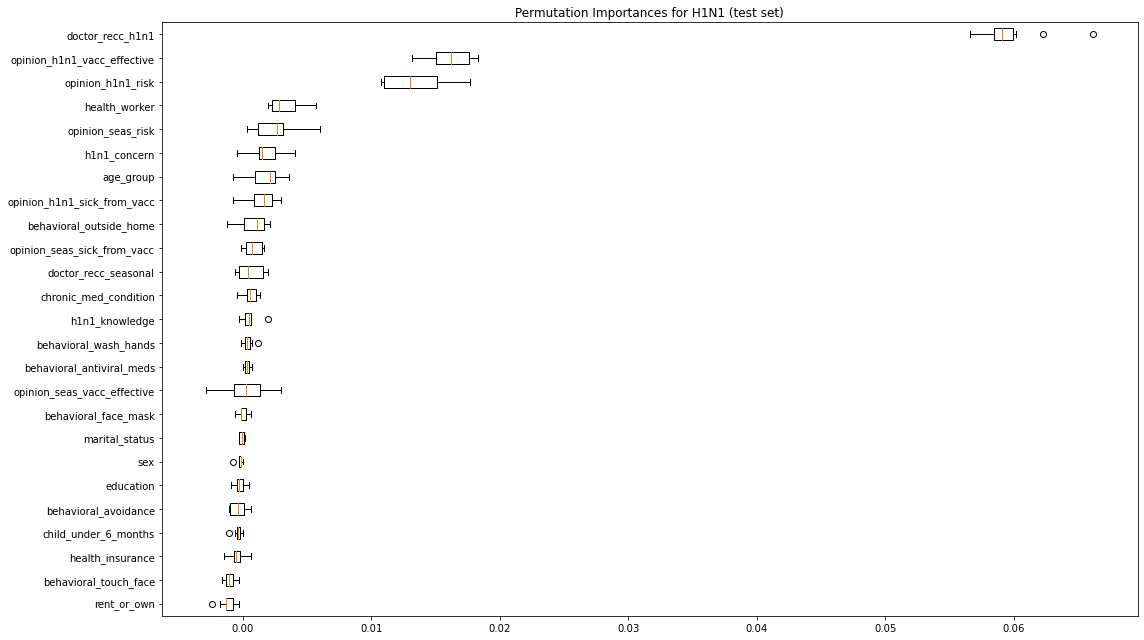

In [82]:
result = permutation_importance(
    gb_3_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()


fig, ax = plt.subplots(figsize=(16,9))
ax.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx]
)
ax.set_title("Permutation Importances for H1N1 (test set)")

fig.tight_layout()
plt.show()



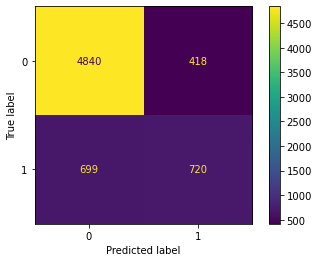

In [83]:
plot_confusion_matrix(gb_3_model,X_test,y_test)

### GB Model 4 - H1N1 

In [84]:
gb_4_model = GradientBoostingClassifier(n_estimators=75, max_depth = 5, min_samples_split= 8 )
gb_4_model.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, min_samples_split=8, n_estimators=75)

In [85]:
y_test_pred=gb_4_model.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8339074434626329


In [86]:
y_score=gb_4_model.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8272189550551647


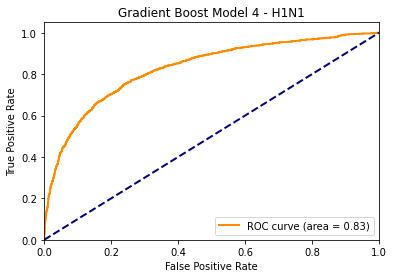

In [87]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boost Model 4 - H1N1")
plt.legend(loc="lower right")
plt.show()

In [88]:
## Sort the features based on their importance from most important to least important
features=X_train.columns
index_importances=gb_4_model.feature_importances_.argsort()[::-1]
sorted_features=features[index_importances]
sorted_features

Index(['doctor_recc_h1n1', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'health_worker', 'h1n1_knowledge', 'opinion_seas_risk',
       'opinion_seas_vacc_effective', 'h1n1_concern', 'chronic_med_condition',
       'doctor_recc_seasonal', 'opinion_seas_sick_from_vacc',
       'opinion_h1n1_sick_from_vacc', 'behavioral_outside_home',
       'behavioral_touch_face', 'behavioral_avoidance',
       'behavioral_wash_hands', 'behavioral_face_mask', 'rent_or_own',
       'health_insurance', 'age_group', 'child_under_6_months', 'education',
       'behavioral_antiviral_meds', 'marital_status', 'sex'],
      dtype='object')

In [89]:
## feature importances
for ii,feature in enumerate(features):
    print(feature,gb_4_model.feature_importances_[ii])

h1n1_concern 0.017958358992057093
h1n1_knowledge 0.04285968243203886
behavioral_antiviral_meds 0.0014701376288780252
behavioral_avoidance 0.009524312243239652
behavioral_face_mask 0.006324489277665253
behavioral_wash_hands 0.009140461278080112
behavioral_outside_home 0.013809029288836571
behavioral_touch_face 0.009849212526132866
doctor_recc_h1n1 0.3607767479536789
doctor_recc_seasonal 0.01694714985857135
chronic_med_condition 0.017742518924471023
child_under_6_months 0.0031388839611483426
health_worker 0.04928238299816552
health_insurance 0.00508137831961985
opinion_h1n1_vacc_effective 0.20836240880555557
opinion_h1n1_risk 0.1278550170527711
opinion_h1n1_sick_from_vacc 0.014499591381473402
opinion_seas_vacc_effective 0.026835374855757283
opinion_seas_risk 0.02993973421062321
opinion_seas_sick_from_vacc 0.015979717126653095
age_group 0.004119728783146263
education 0.0014804703321912747
sex 0.00042814493939126745
marital_status 0.001376585259678659
rent_or_own 0.005218481570175479


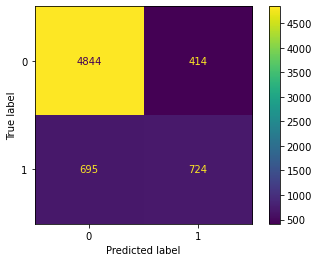

In [90]:
plot_confusion_matrix(gb_4_model,X_test,y_test)

### GB Model 5 - H1N1 - BEST H1N1 MODEL

In [92]:
gb_5_model = GradientBoostingClassifier(n_estimators=150, max_depth= 5, min_samples_split= 6, 
                                        min_samples_leaf=4)
gb_5_model.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=6,
                           n_estimators=150)

In [93]:
filepath = 'models/Gradient_boost/H1N1/model_4.pickl'
pickle.dump(gb_5_model.fit, open(filepath, 'wb'))

In [94]:
y_test_pred=gb_5_model.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8351055863411712


In [96]:
y_score=gb_5_model.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8287496270658142


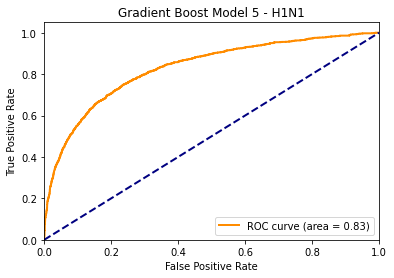

In [97]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boost Model 5 - H1N1")
plt.legend(loc="lower right")
plt.show()

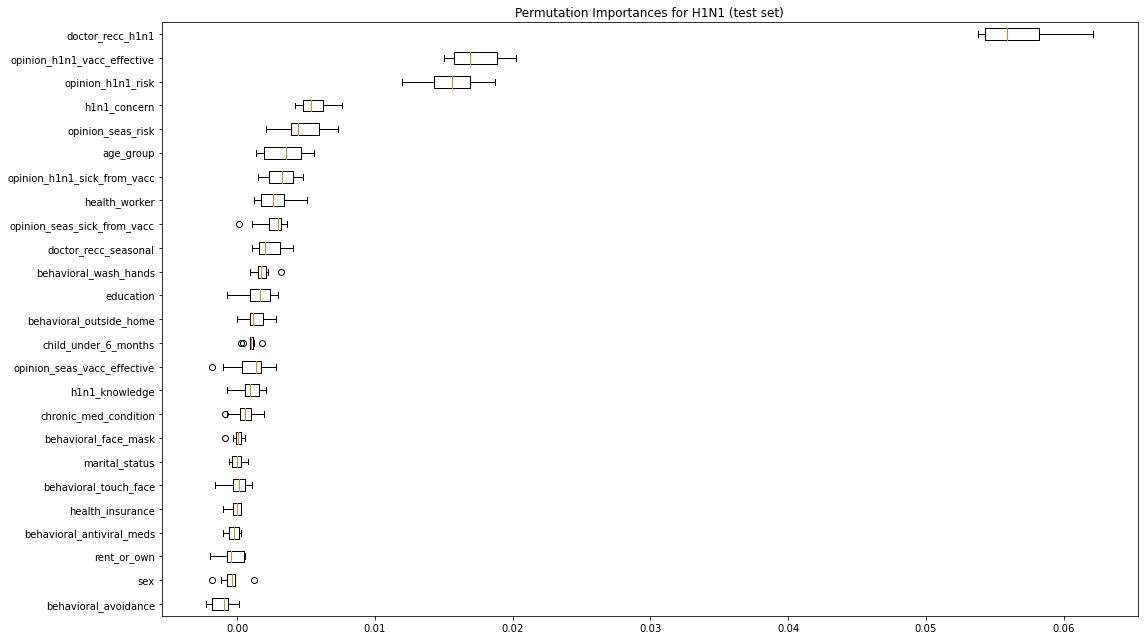

In [98]:
result = permutation_importance(
    gb_5_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()


fig, ax = plt.subplots(figsize=(16,9))
ax.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx]
)
ax.set_title("Permutation Importances for H1N1 (test set)")

fig.tight_layout()
plt.show()


### X Gradient Boost Grid Search

In [99]:
# params={'learning_rate':[0.1, 0.2],
#           'max_depth':[3, 6, 9],
#           'min_child_weight':[1, 5],
#           'subsample': [0.7, 1],
#           'colsample_bytree':[0.7, 1]}
# model = XGBClassifier()


# grid_search=GridSearchCV(model,params, scoring ='recall_macro')
# grid_search.fit(X_train,y_train)

In [100]:
# grid_search.best_params_

In [101]:
# best_model=grid_search.best_estimator_

In [102]:
# best_model=grid_search.best_estimator_
# y_test_pred=best_model.predict(X_test)
# test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
# print('Test Set accuracy: ',test_accuracy)

In [103]:
# y_score=best_model.predict_proba(X_test)[:,1]
# fpr, tpr,_ = roc_curve(y_test, y_score)
# roc_auc = auc(fpr, tpr)
# print('ROC AUC',roc_auc)

In [104]:
# plt.figure()
# lw = 2
# plt.plot(
#     fpr,
#     tpr,
#     color="darkorange",
#     lw=lw,
#     label="ROC curve (area = %0.2f)" % roc_auc,
# )
# plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Receiver operating characteristic example")
# plt.legend(loc="lower right")
# plt.show()

## Voting Classifier  - H1N1

In [105]:
clf1 = GradientBoostingClassifier()
clf2 = RandomForestClassifier(n_estimators=500,max_depth=10,random_state=1)
clf3 = AdaBoostClassifier()

In [106]:
eclf1 = VotingClassifier(estimators=[('gb', clf1), ('rf', clf2), ('ab', clf3)], voting='hard')

In [107]:
eclf1.fit(X_train, y_train)

VotingClassifier(estimators=[('gb', GradientBoostingClassifier()),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=500,
                                                     random_state=1)),
                             ('ab', AdaBoostClassifier())])

In [108]:
y_test_pred=eclf1.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.8273176576306724


## Train Model - Seasonal 

In [109]:
df_2['seasonal_vaccine'] = df['seasonal_vaccine']


In [110]:
df_2 = df.drop(columns =['hhs_geo_region', 
                   'employment_industry', 
                   'employment_occupation', 
                   'household_adults',
                   'household_children',
                   'employment_status', 
                   'income_poverty',
                   'race', 
                   'behavioral_large_gatherings',
                    'census_msa',
                    'h1n1_vaccine',
                    'opinion_h1n1_vacc_effective',
                    'opinion_h1n1_risk',
                    'opinion_h1n1_sick_from_vacc',
                    ])
                                    

In [111]:
df_2.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1',
       'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months',
       'health_worker', 'health_insurance', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'sex', 'marital_status', 'rent_or_own',
       'seasonal_vaccine'],
      dtype='object')

In [112]:
df_2['rent_or_own'] = df_2['rent_or_own'].replace(to_replace = "Own", value = 0)
df_2['rent_or_own'] = df_2['rent_or_own'].replace(to_replace = "Rent", value = 1)
df_2['rent_or_own'] = df_2['rent_or_own'].replace(to_replace = "unknown", value = 2)

# encoder=LabelEncoder()
# df_2['rent_or_own']=encoder.fit_transform(df_2['rent_or_own'])

In [113]:
df_2['marital_status'] = df_2['marital_status'].replace(to_replace = "Not Married", value = 0)
df_2['marital_status'] = df_2['marital_status'].replace(to_replace = "Married", value = 1)
df_2['marital_status'] = df_2['marital_status'].replace(to_replace = "unknown", value = 2)



# encoder=LabelEncoder()
# df_2['marital_status']=encoder.fit_transform(df_2['marital_status'])

In [114]:
df_2['sex'] = df_2['sex'].replace(to_replace = "Female", value = 0)
df_2['sex'] = df_2['sex'].replace(to_replace = "Male", value = 1)

# encoder=LabelEncoder()
# df_2['sex']=encoder.fit_transform(df_2['sex'])

In [115]:
df_2['education'] = df_2['education'].replace(to_replace = "< 12 Years", value = 0)
df_2['education'] = df_2['education'].replace(to_replace = "12 Years", value = 1)
df_2['education'] = df_2['education'].replace(to_replace = "Some College", value = 2)
df_2['education'] = df_2['education'].replace(to_replace = "College Graduate", value = 3)
df_2['education'] = df_2['education'].replace(to_replace = "unknown", value = 4)

# encoder=LabelEncoder()
# df_2['education']=encoder.fit_transform(df_2['education'])

In [116]:
df_2['age_group'] = df_2['age_group'].replace(to_replace = "18 - 34 Years", value = 0)
df_2['age_group'] = df_2['age_group'].replace(to_replace = "35 - 44 Years", value = 1)
df_2['age_group'] = df_2['age_group'].replace(to_replace = "45 - 54 Years", value = 2)
df_2['age_group'] = df_2['age_group'].replace(to_replace = "55 - 64 Years", value = 3)
df_2['age_group'] = df_2['age_group'].replace(to_replace = "65+ Years", value = 4)

# encoder=LabelEncoder()
# df_2['age_group']=encoder.fit_transform(df_2['age_group'])

In [117]:
## Train model
X = df_2.drop("seasonal_vaccine", axis=1)
y = df_2["seasonal_vaccine"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [118]:
X_train

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,...,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,sex,marital_status,rent_or_own
respondent_id,,,,,,,,,,,,,,,,,,,,,
7273,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,4.0,2.0,2.0,4,1,0,1,0
13773,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,5.0,2.0,2.0,3,2,0,0,0
24162,1.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,4.0,4.0,2.0,4,3,0,1,0
17341,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,4,2,0,0,0
23521,2.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,5.0,4.0,4.0,4,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,5.0,4.0,2.0,0,2,0,0,0
19026,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,5.0,4.0,1.0,1,2,1,0,0
21502,3.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,5.0,5.0,1.0,4,3,0,1,0


## Decision Tree - Seasonal 

In [119]:
tree_model_seasonal = DecisionTreeClassifier(random_state=42)
tree_model_seasonal.fit(X_train,y_train) 

DecisionTreeClassifier(random_state=42)

In [120]:
y_test_pred=tree_model_seasonal.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.6690130298038041


In [121]:
y_score=tree_model_seasonal.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.6702695829553141


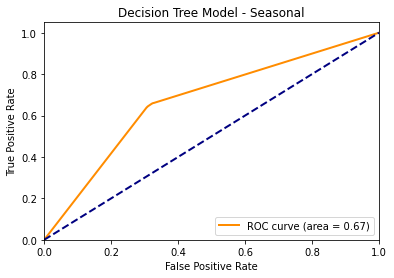

In [122]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree Model - Seasonal")
plt.legend(loc="lower right")
plt.show()

In [123]:
## Cross validation on the whole dataset, take advantage of the whole dataset
tree_model_seasonal = DecisionTreeClassifier(random_state=42)
tree_log_loss = cross_val_score(tree_model, X, y, scoring="accuracy",cv=5)
tree_log_loss

array([0.67521528, 0.68139274, 0.67927354, 0.67272046, 0.67028646])

In [124]:
print('Cross Validation accuracy',tree_log_loss.mean())

Cross Validation accuracy 0.6757776967604576


## Random Forest - Seasonal 

In [125]:
## Train model
rf_model_seasonal = RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42)
rf_model_seasonal.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=500, random_state=42)

In [126]:
y_test_pred=rf_model_seasonal.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.771004942339374


In [127]:
y_score=rf_model_seasonal.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.849878237562869


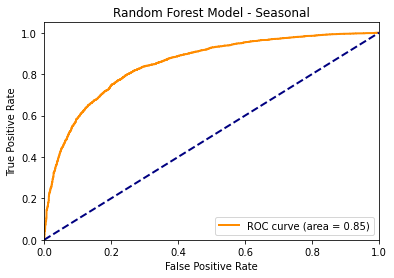

In [128]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Model - Seasonal")
plt.legend(loc="lower right")
plt.show()

## ADA Boost - Seasonal 

In [129]:
## Train model
ab_model_seasonal = AdaBoostClassifier()
ab_model_seasonal.fit(X_train,y_train)

AdaBoostClassifier()

In [130]:
y_test_pred=ab_model_seasonal.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.7713044780590086


In [131]:
y_score=ab_model_seasonal.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8492399020203171


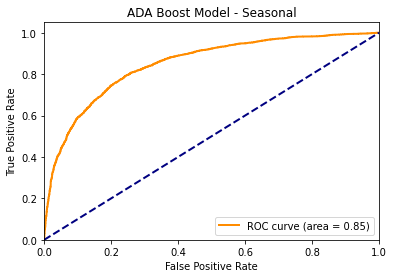

In [132]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ADA Boost Model - Seasonal")
plt.legend(loc="lower right")
plt.show()

## Gradient Boost - Seasonal 

### GB Model 1 - Seasonal 

In [133]:
## Train model
gb_model_seasonal = GradientBoostingClassifier()
gb_model_seasonal.fit(X_train,y_train)

GradientBoostingClassifier()

In [134]:
y_test_pred=gb_model_seasonal.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.7769956567320653


In [135]:
y_score=gb_model_seasonal.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8525366017507395


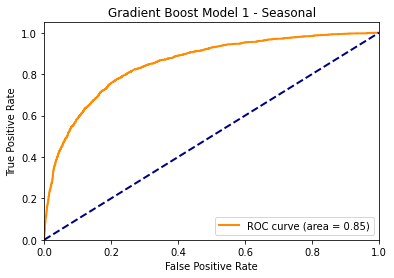

In [136]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boost Model 1 - Seasonal")
plt.legend(loc="lower right")
plt.show()

### GB Model 2 - Seasonal 

In [137]:
gb_2_model_seasonal = GradientBoostingClassifier(n_estimators=50, max_depth = 5)
gb_2_model_seasonal.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=50)

In [138]:
y_test_pred=gb_2_model_seasonal.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.7742998352553542


In [139]:
y_score=gb_2_model_seasonal.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)


ROC AUC 0.8520004936485568


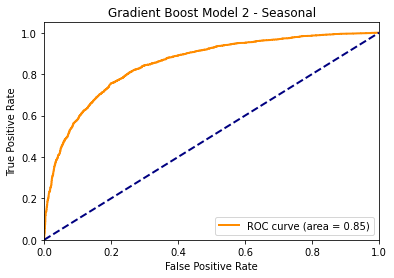

In [140]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boost Model 2 - Seasonal")
plt.legend(loc="lower right")
plt.show()

### GB Model 3 - Seasonal

In [141]:
gb_3_model_seasonal = GradientBoostingClassifier(n_estimators=75, max_depth = 5)
gb_3_model_seasonal.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=75)

In [142]:
y_test_pred=gb_3_model_seasonal.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.776845888872248


In [143]:
y_score=gb_3_model_seasonal.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)


ROC AUC 0.8521396365535038


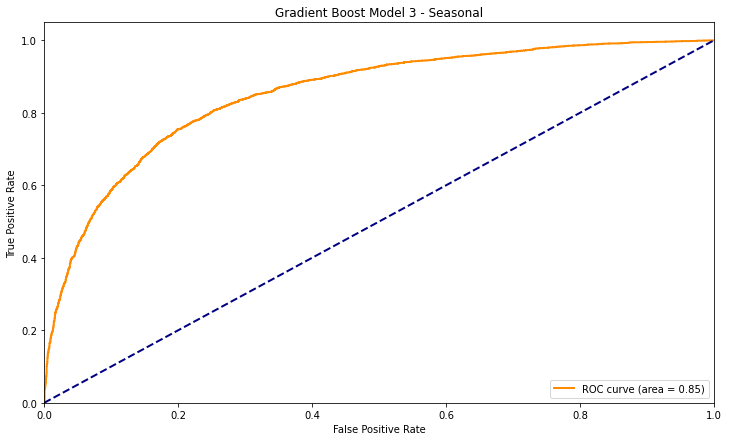

In [144]:
plt.figure(figsize= (12,7))
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boost Model 3 - Seasonal")
plt.legend(loc="lower right")
plt.show()

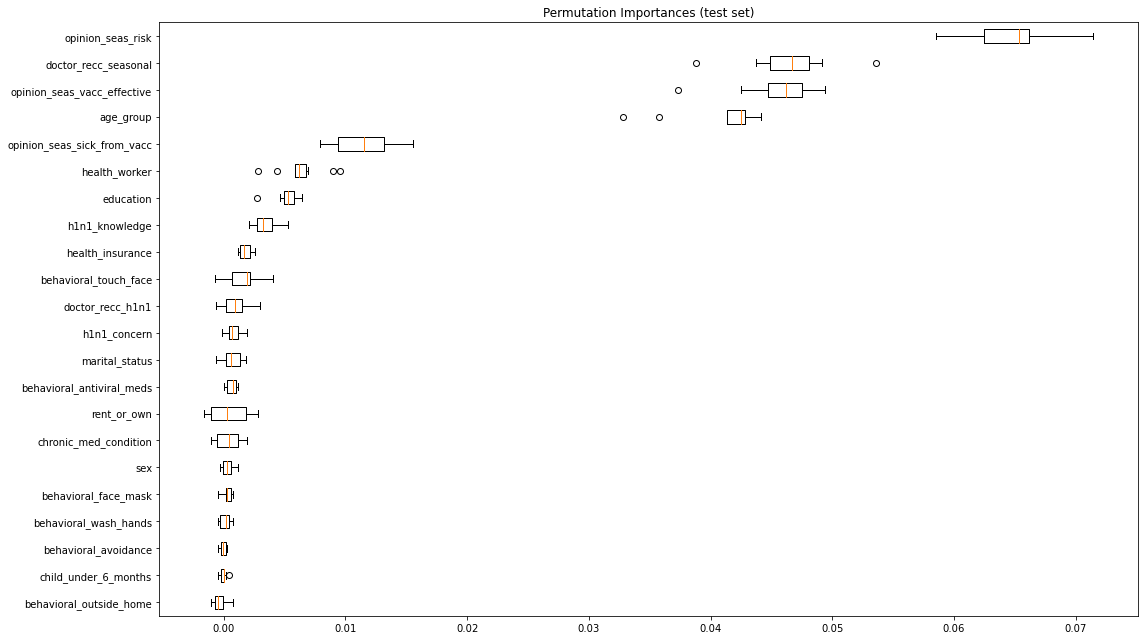

In [145]:
result = permutation_importance(
    gb_3_model_seasonal, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()


fig, ax = plt.subplots(figsize=(16,9))
ax.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx]
)
ax.set_title("Permutation Importances (test set)")

fig.tight_layout()
plt.show()

### Confusion Matrix

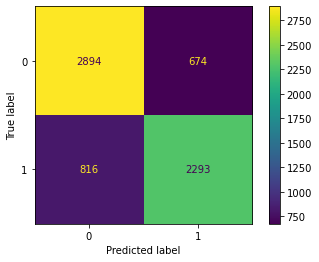

In [146]:
plot_confusion_matrix(gb_3_model_seasonal,X_test,y_test)

In [147]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      3568
           1       0.77      0.74      0.75      3109

    accuracy                           0.78      6677
   macro avg       0.78      0.77      0.78      6677
weighted avg       0.78      0.78      0.78      6677



### GB Model 4 - Seasonal  - BEST SEASONAL MODEL - 

In [148]:
gb_4_model_seasonal = GradientBoostingClassifier(n_estimators=75, max_depth = 5, min_samples_split= 8 )
gb_4_model_seasonal.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, min_samples_split=8, n_estimators=75)

In [149]:
filepath = 'models/Gradient_boost/seasonal/model_3.pickl'
pickle.dump(gb_4_model_seasonal, open(filepath, 'wb'))

In [150]:
y_test_pred=gb_4_model_seasonal.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.7784933353302381


In [151]:
y_score=gb_4_model_seasonal.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8521795268906848


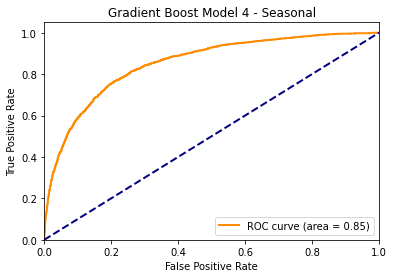

In [152]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boost Model 4 - Seasonal")
plt.legend(loc="lower right")
plt.show()

### GB Model 5 - Seasonal

In [153]:
gb_5_model_seasonal = GradientBoostingClassifier(n_estimators=75, max_depth = 5, min_samples_split= 8, 
                                        min_samples_leaf=2)
gb_5_model_seasonal.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=8,
                           n_estimators=75)

In [154]:
y_test_pred=gb_5_model_seasonal.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.7771454245918826


In [155]:
y_score=gb_5_model_seasonal.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC',roc_auc)

ROC AUC 0.8521579365273968


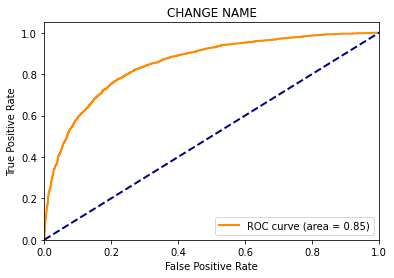

In [156]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("CHANGE NAME")
plt.legend(loc="lower right")
plt.show()

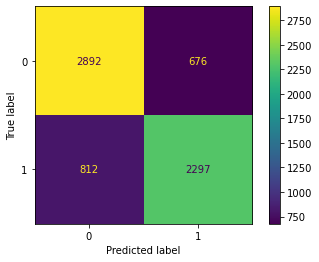

In [157]:
plot_confusion_matrix(gb_5_model_seasonal,X_test,y_test)

## Voting Classifier - Seasonal 

In [158]:
clf1 = GradientBoostingClassifier()
clf2 = RandomForestClassifier(n_estimators=500,max_depth=10,random_state=1)
clf3 = AdaBoostClassifier()

In [159]:
eclf1 = VotingClassifier(estimators=[('gb', clf1), ('rf', clf2), ('ab', clf3)], voting='hard')

In [160]:
eclf1.fit(X_train, y_train)

VotingClassifier(estimators=[('gb', GradientBoostingClassifier()),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=500,
                                                     random_state=1)),
                             ('ab', AdaBoostClassifier())])

In [161]:
y_test_pred=eclf1.predict(X_test)
test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
print('Test Set accuracy: ',test_accuracy)

Test Set accuracy:  0.7744496031151715
